<a href="https://colab.research.google.com/github/lewisnjue/AI/blob/main/pytorch_datasets_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

custom datasets refer to datasets created by the user to handle data that isnt part of the commonly used standard datasets
these are typically used when you have your own datai formats like iamges, text , audio or nemerical data or when you wan to prepocess or augment existing datasets in unique ways.

## key aspocets of cusom datasets.

1. non standard dataforamts: custom datasets are used when dat isnt proforammeted for frameowkr like pytorch for example
  - iamges stored in custom folder sturcres
  - tabular data in .csv file
  - coplex strcures lke multi modela

2. flexibility: custom datasets allow you to:
  - define specific data proporcessign steps.
  - apply cusotm data augmentaion
  - integrate data form multiple soruces


3. integration with dataloaders: custom datasetsare compatible with pytorches dataloader , which can handle batching , shuffling and parallel loadingof data, simplying training pipelines

## why use custom datasets in deep learing

- real- world applcations: most deep leanring projects rely on data unique to a specific domain( eg medical iamges , satellie data , sensor readigns) . predefined datasets often dont suti these needs

- cutom preporcessing: real-world data usually requires unique preprocessing stes lke normalizaion , resizing , tokenizaion or feature extracion
- data augmentaiton: custom datasets allow youto define specific augmentaion techiques ( eg roeation, croppign for iamges) to increase dataset diversity and robustness.

- efficency: cutom datasets can handle large-scale dat efficently by loading data on demand( lazy loaidng ) instead of keepign everythign in memory




## example custom dataset in pytorch for iamge data
hre an example of custom dataset for laodig iamge from disk


```py

import torch
from torch.utils.data import Dataset
from PIL import Image
import os

class CustomImageDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_files = os.listdir(image_dir)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_files[idx])
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label = 1 if "cat" in self.image_files[idx] else 0  # Example labeling
        return image, label


```

usage with dataloader

```py

from torchvision import transforms
from torch.utils.data import DataLoader

# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Load custom dataset
dataset = CustomImageDataset(image_dir="path/to/images", transform=transform)

# Create DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Iterate over batches
for images, labels in dataloader:
    print(images.shape, labels)

```

these process can adapted ot other types of data such as text , audio or numerical datasts , using similar pronciples bu twith data-speicfic proprocessing steps.




In [1]:
import torch
from torch.utils.data import Dataset
from PIL import Image
import os
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

our datasrt is a subset of food101 dataset.
food101 start 101 different classes of food
our datasetr starts with 3 classes of food and only 10% of the iamges
why do this?
when starting our ml project its imaportat to start with small scale and then increase the scale when necessary
the whole point is to spee up how fast how can exprement

In [2]:
import requests
import zipfile # our data is in form of zip file
from pathlib import Path
# setup apth of thdata
data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'
# if the imagefolder does not exist download the data and if it exits skip
if image_path.is_dir():
  print(f"{image_path} directory exists")
else:
  print(f"Did not find {image_path} directory, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)# this creates the direcotry



Did not find data/pizza_steak_sushi directory, creating one...


In [3]:
# downlaod pizza, steak andsuchi data
with open(data_path/'pizza_steak_sushi.zip', 'wb') as f:
  request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
  print('downloading pizza, steak and sushi data')
  f.write(request.content)
# unzip pizza, steak, sushi data

with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip', 'r') as zip_ref:
  print('unzipping pizza, steak and sushi data')
  zip_ref.extractall(image_path)

image_path


downloading pizza, steak and sushi data
unzipping pizza, steak and sushi data


PosixPath('data/pizza_steak_sushi')

## becoming one with the data ( data preparation and data exploration)

In [5]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory

  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")


In [6]:
walk_through_dir(image_path)

there are 2 directories and 0 images in 'data/pizza_steak_sushi'
there are 3 directories and 0 images in 'data/pizza_steak_sushi/test'
there are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'
there are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'
there are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'
there are 3 directories and 0 images in 'data/pizza_steak_sushi/train'
there are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'
there are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'
there are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'


In [7]:
# setup traing and testign paths
train_dir = image_path / 'train'
test_dir = image_path / 'test'

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## visualizing image
lets write some code to:
- get all of the imagepaths
- pick a ranom image path using ptyhon ranodm.choice

- get the image class name `pathlib.Path.parent.step`
- since were working with images lets open the image with python PIL
- well then show the image and print metadata

Random image path: data/pizza_steak_sushi/train/pizza/2687575.jpg
Image class: pizza
Image height: 384
Image width: 512


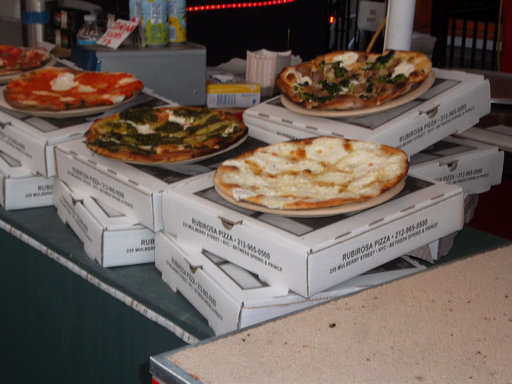

In [26]:
import random
from  PIL import Image

# set seed
#random.seed(42)

# get all  image paths

image_path_list = list(image_path.glob('*/*/*.jpg'))# list of all the images
# pick a random image path
random_image_path = random.choice(image_path_list)
random_image_path
# get image class from the path name ( the name class is teh name of the direcotry where the image is stored )
image_class = random_image_path.parent.stem # give me the calss name this is soo cool
# lets open the image using PIL

img = Image.open(random_image_path)
# show the image , this is so cool i like it  img

# print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

i### try to visualize iamge with matplotlib..



(384, 512, 3)


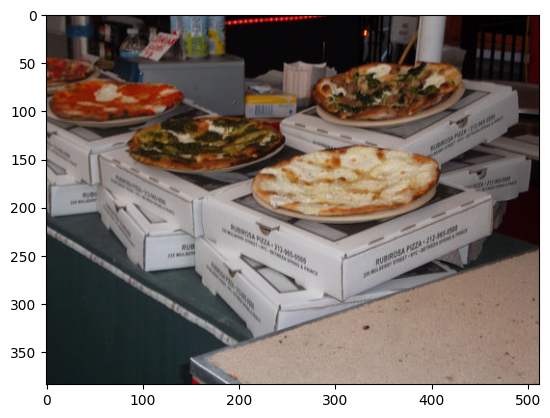

In [30]:
import numpy as np
import matplotlib.pyplot as plt # for ploting this is so cool
import matplotlib
%matplotlib inline
# turns image ot array
img_as_array = np.array(img)
# plot the image using matplotlib
plt.imshow(img_as_array)
print(img_as_array.shape)

when plotting images using matplotlib , the image can either be a numpy array or pytorch tensor, byt ehre are some key differences in hanlding these tho formats:

1. numpy arrays:

matplotlbi is designed to work natively with numpy array if your image is a nupy array , youc an directly pass it to plt.imshow()

reuirements for numpy arrays:

-the array should have dimensiions:
  - H X W X C ( height x width x channels) for RGB images
  - H X W for grayscale images.

- the pixel values shuld be typcally be in one fo the following ranges:
  - [0,1] for normaized images ( eg floaiing point values)
  - [ o, 255] for integer (uints8) images.


example

```py

import matplotlib.pyplot as plt
import numpy as np

# Example RGB image as a NumPy array
image = np.random.rand(128, 128, 3)  # H x W x C
plt.imshow(image)
plt.title("RGB Image")
plt.axis("off")
plt.show()
```

2. pytorch tensors
if your iamge is in pytorch tesoor format, you may need to convert it to a numpy array befor plotting because matplotlib does not natively support pytorhc tensors

### key differences in tensors:

- pytorch tensors typically have dimennsions:
  - C X H X W
  - this si differenct form teh numpy format ( H X W X C ) so you need to tranopose the tensor to matpch the expected format

- if the gensor is on a GPU, you must move it to the CPU and convert it to ta NUMPY arrayusing .cpu().numpy()


example

convertion exaple

```py
import torch
import matplotlib.pyplot as plt

# Example tensor (C x H x W)
image_tensor = torch.rand(3, 128, 128)  # Random RGB image

# Convert to NumPy array
image_numpy = image_tensor.permute(1, 2, 0).numpy()  # H x W x C
plt.imshow(image_numpy)
plt.title("RGB Image from Tensor")
plt.axis("off")
plt.show()
```

### direct tensor visulaizaion (optinal)

if youre using libaresi like torchvisio , they provide utilies such as `torchvision.transforms.ToPILImage`` to convert a tesnor to a PIL image matplotlib can handle PIL image directly

example

```py

from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt

image_tensor = torch.rand(3, 128, 128)  # Random RGB image

# Convert tensor to PIL Image
to_pil = ToPILImage()
image_pil = to_pil(image_tensor)

plt.imshow(image_pil)
plt.title("RGB Image from PIL")
plt.axis("off")
plt.show()

```

